<a href="https://colab.research.google.com/github/sakshijain23/Breast-Cancer/blob/master/Breast_Cancer_using_Decission_Tree_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dataset From Sklearn Library

In [0]:
import sklearn.datasets
import numpy as np 
breast_cancer=sklearn.datasets.load_breast_cancer()
x=breast_cancer.data
Y=breast_cancer.target
import pandas as pd
data=pd.DataFrame(breast_cancer.data,columns=breast_cancer.feature_names)
data['class']=breast_cancer.target
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Describing the data 

In [0]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


Getting the number of samples of both the class

In [0]:
print(data['class'].value_counts())

1    357
0    212
Name: class, dtype: int64


In [0]:
print(breast_cancer.target_names)
data.groupby('class').mean()
#print(data)
x=data.drop('class',axis=1)
Y=data['class']
columns1=list(x.columns)
print(columns1)

['malignant' 'benign']
['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


Getting data clear and removing uncorrelated attributes

**Preprocessing**

Since, some attributes have values more than 1000 and some have values within range 0-1. So, we apply min-max, to normalise the data within same range 

In [0]:
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()

#mm_scaler.transform(X_test)

def norma_x1(col,x):
  new_data={}
  for i in col:
    el=np.array([x[i]]).reshape(-1,1)
    #print(el.dim)
    max1=el.max()

    #print(type(max1))
    #print(max1)
    if(max1>1):
      normalized_X =mm_scaler.fit_transform(el)
    else:
      normalized_X=el
    
    new_data[i]=pd.Series(normalized_X.flatten())
  #new_data=pd.DataFrame(new_data,index=[0])
  print(type(new_data))
  return new_data

Getting the normalised data into new variable.
and now, all the variables have the same range(0,1).

In [0]:
preprocessed_data=norma_x1(columns1,x)
#print(preprocessed_data['mean radius'])
new_data=pd.DataFrame(preprocessed_data)
#print(new_data)
new_data.describe()

<class 'dict'>


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.332935,0.216920,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.106345,0.189324,0.099376,0.062636,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,0.296663,0.363998,0.283138,0.170906,0.132369,0.220212,0.217403,0.114606,0.290076,0.083946
std,0.166787,0.145453,0.167915,0.149274,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.100421,0.121917,0.095267,0.084967,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,0.171940,0.163813,0.167352,0.139932,0.022832,0.152649,0.166633,0.065732,0.061867,0.018061
min,0.000000,0.000000,0.000000,0.000000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.000000,0.000000,0.000000,0.000000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,0.000000,0.000000,0.000000,0.000000,0.071170,0.000000,0.000000,0.000000,0.156500,0.055040
25%,0.223342,0.218465,0.216847,0.117413,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.043781,0.104690,0.040004,0.020635,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,0.180719,0.241471,0.167837,0.081130,0.116600,0.116337,0.091454,0.064930,0.250400,0.071460
50%,0.302381,0.308759,0.293345,0.172895,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.077023,0.165267,0.072092,0.033112,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,0.250445,0.356876,0.235320,0.123206,0.131300,0.179110,0.181070,0.099930,0.282200,0.080040
75%,0.416442,0.408860,0.416765,0.271135,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.133044,0.246155,0.122509,0.071700,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,0.386339,0.471748,0.373475,0.220901,0.146000,0.302520,0.305831,0.161400,0.317900,0.092080
max,1.000000,1.000000,1.000000,1.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,1.000000,1.000000,1.000000,1.000000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,1.000000,1.000000,1.000000,1.000000,0.222600,1.000000,1.000000,0.291000,0.663800,0.207500


This function display the correlation plot of the attributes.



In [0]:
 def show_matrix(x,col): 
  import matplotlib.pyplot as plt
  #import matplotlib.pyplot as plt
  data =pd.DataFrame(x)
  corr = data.corr()
  fig = plt.figure(figsize=(8, 8))
  ax = fig.add_subplot(111)
  cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
  fig.colorbar(cax)
  ticks = np.arange(0,len(data.columns),1)
  ax.set_xticks(ticks)
  plt.xticks(rotation=90)
  ax.set_yticks(ticks)
  ax.set_xticklabels(col)
  ax.set_yticklabels(col)
  plt.show()

This, function takes only the columns or features passed and create new data frame

In [0]:
def sel(columns,x):
  new_data={}
  for i in columns:
      new_data[i]=pd.Series(x[i])

  new_data=pd.DataFrame(new_data)
  return new_data


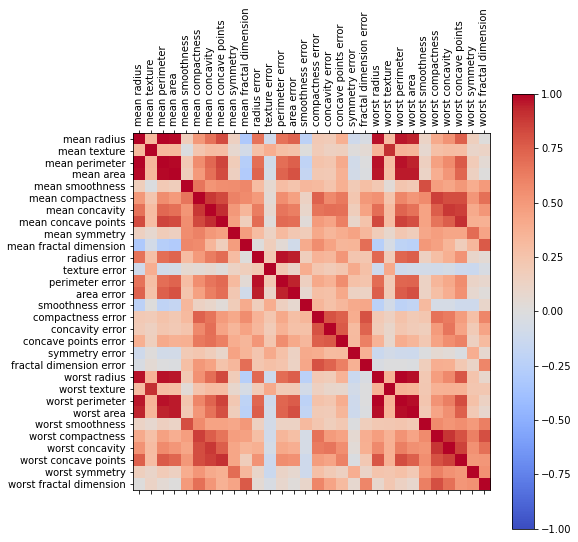

In [0]:
columns=new_data.columns
show_matrix(new_data,columns)
#

Since, these attributes shows the higer correlation between each other. 

In [0]:
col=['mean radius','mean texture','mean perimeter','mean area','mean compactness','mean concavity','mean concave points','worst compactness','worst concave points']

data_selected_columns=sel(col,new_data)



**Building the model**

We take 70% data for modelling and 30% data for testing

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data_selected_columns,Y,test_size=0.3,random_state=1)
print(Y.mean(),y_train.mean(),y_test.mean())

0.6274165202108963 0.6256281407035176 0.631578947368421


**Model- Decission Tree** 

In [0]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.935672514619883


We, got the accuracy of 93% using **GINI** criteria and **max_depth==3** to avoid overfitting

**DECISION TREE STRUCTURE**

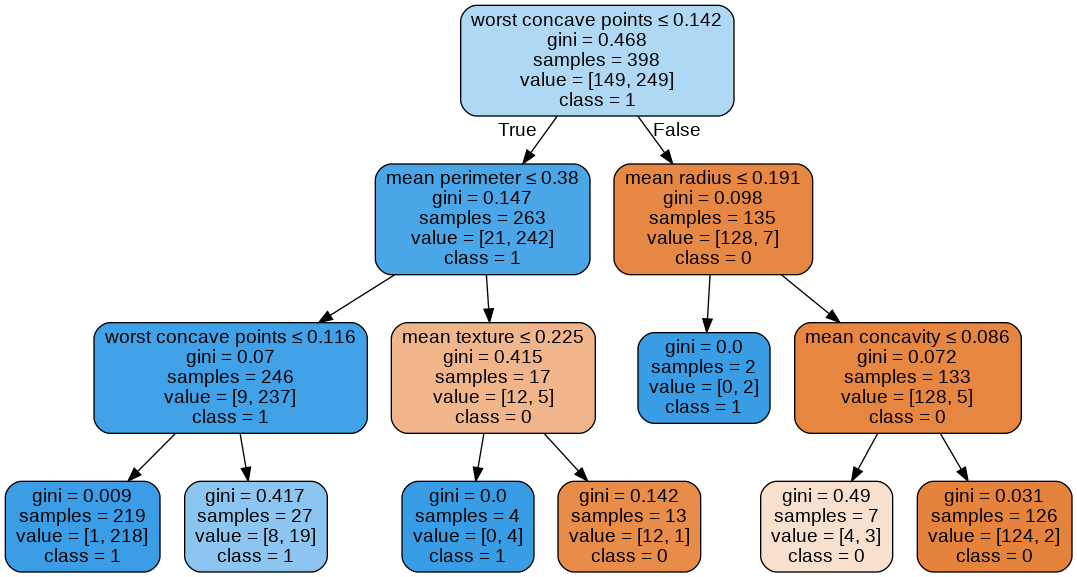

In [0]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names =col ,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('breast_cancer.png')
Image(graph.create_png())